##SUBHAV GOYAL
3CO17
102053022


In [41]:
## Dataset : Occupancy Estimation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
# Read the dataset
path= "/content/drive/MyDrive/Occ_Estimation.csv"
df = pd.read_csv(path)
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


<Axes: ylabel='count'>

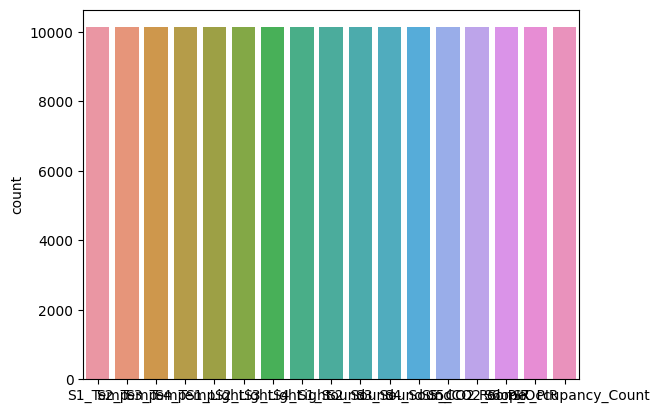

In [43]:
## Visualizing the dataset using catplot show distribution of each class
sns.countplot(data=df)

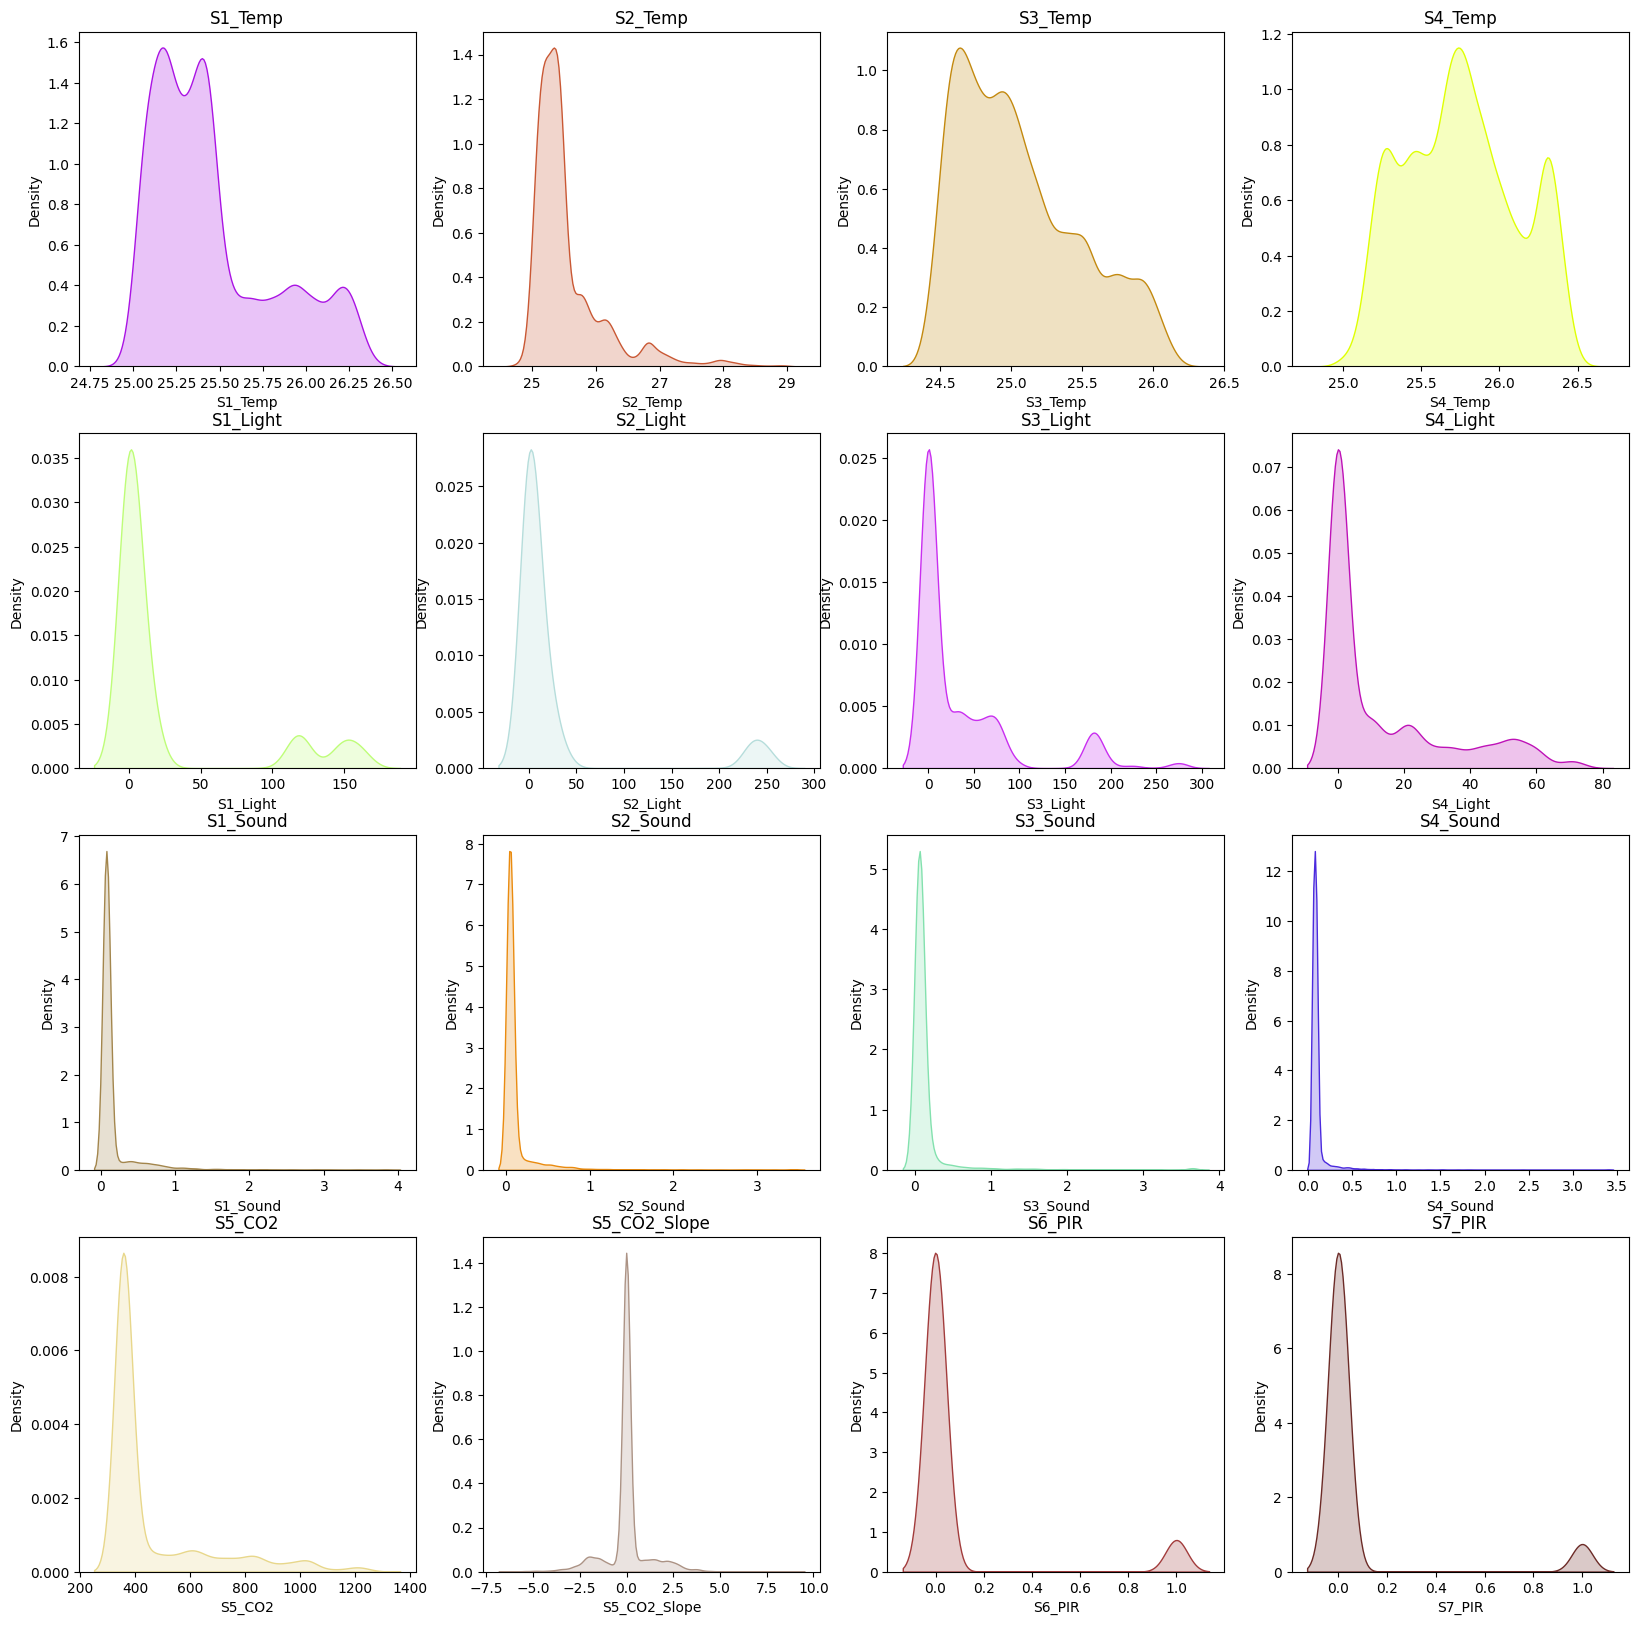

In [44]:
# Splitting the dataset into the Training set and Test set
import random
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    # Create histogram for each column kde only and different random color
    sns.kdeplot(df[df.columns[i]], ax=ax, color=(random.random(), random.random(), random.random()), shade=True)
    ax.set_title(df.columns[i])

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('Room_Occupancy_Count', axis=1))
y = df['Room_Occupancy_Count']

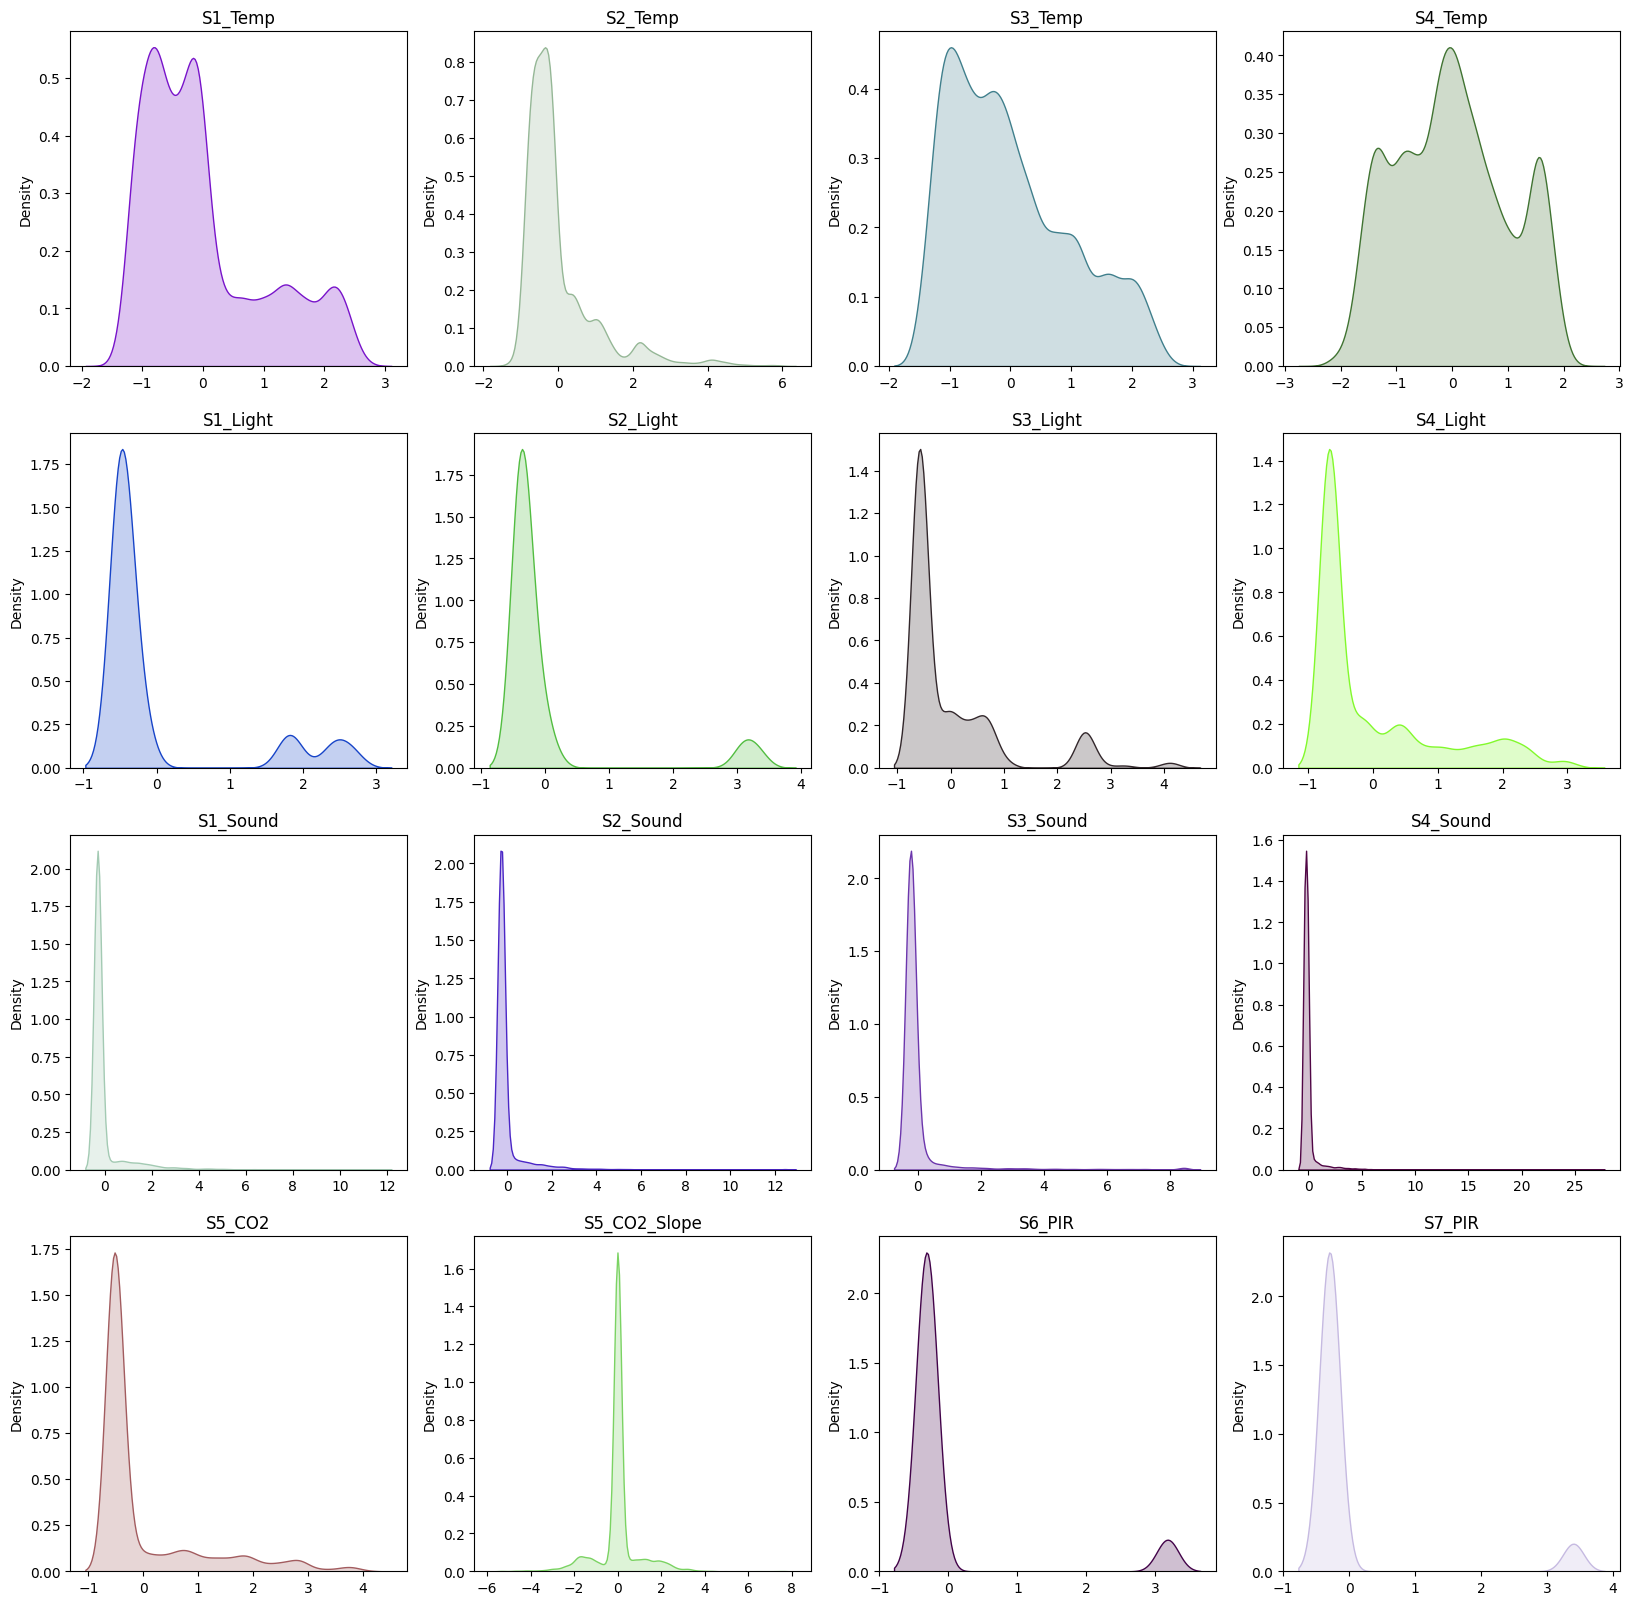

In [46]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    # Create histogram for each column kde only and different random color
    sns.kdeplot(X[:,i], ax=ax, color=(random.random(), random.random(), random.random()), shade=True)
    ax.set_title(df.columns[i])

In [47]:
# Create 10 samples of the splitted dataset with 70% training and 30% test
samples = []
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    samples.append((X_train, X_test, y_train, y_test))

In [48]:
# Use SVM to train the model
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best kernel', 'Best Nu', 'Best Epsilon'])


def fitnessFunction(kernel, C, gamma):
    classifer = SVC(kernel=kernel, C=C, gamma=gamma,max_iter=1000)
    classifer.fit(X_train, y_train)
    return classifer.score(X_test, y_test)
    

for i in range(len(samples)):
    best_score = 0
    best_C = 0
    best_gamma = 0
    learningCurves = []
    for kernel in kernels:
        print('Sample : ', i, 'Kernel : ', kernel)
        X_train, X_test, y_train, y_test = samples[i]
        C = np.random.uniform(0.1, 10)
        # Randomly choose gamma
        gamma = np.random.uniform(0.1, 10)
        score = fitnessFunction(kernel, C, gamma)
        if score > best_score:
            best_score = round(score, 2)
            best_C = round(C, 2)
            best_gamma = round(gamma, 2)
            best_kernel = kernel
    print('Best Accuracy : ', best_score, 'Best kernel : ', best_kernel, 'Best Nu : ', best_C, 'Best Epsilon : ', best_gamma)
    result.loc[i] = [i, best_score, best_kernel, best_C, best_gamma]

Sample :  0 Kernel :  linear
Sample :  0 Kernel :  poly
Sample :  0 Kernel :  rbf
Sample :  0 Kernel :  sigmoid
Best Accuracy :  1.0 Best kernel :  linear Best Nu :  3.92 Best Epsilon :  1.43
Sample :  1 Kernel :  linear
Sample :  1 Kernel :  poly
Sample :  1 Kernel :  rbf
Sample :  1 Kernel :  sigmoid
Best Accuracy :  0.99 Best kernel :  linear Best Nu :  6.86 Best Epsilon :  6.24
Sample :  2 Kernel :  linear
Sample :  2 Kernel :  poly
Sample :  2 Kernel :  rbf
Sample :  2 Kernel :  sigmoid
Best Accuracy :  1.0 Best kernel :  linear Best Nu :  2.41 Best Epsilon :  1.85
Sample :  3 Kernel :  linear
Sample :  3 Kernel :  poly
Sample :  3 Kernel :  rbf
Sample :  3 Kernel :  sigmoid
Best Accuracy :  0.99 Best kernel :  poly Best Nu :  8.44 Best Epsilon :  9.41
Sample :  4 Kernel :  linear
Sample :  4 Kernel :  poly
Sample :  4 Kernel :  rbf
Sample :  4 Kernel :  sigmoid
Best Accuracy :  0.99 Best kernel :  poly Best Nu :  9.7 Best Epsilon :  6.49
Sample :  5 Kernel :  linear
Sample :  5 K

In [49]:
print(result.to_markdown(showindex=False))

|   Sample |   Best Accuracy | Best kernel   |   Best Nu |   Best Epsilon |
|---------:|----------------:|:--------------|----------:|---------------:|
|        0 |            1    | linear        |      3.92 |           1.43 |
|        1 |            0.99 | linear        |      6.86 |           6.24 |
|        2 |            1    | linear        |      2.41 |           1.85 |
|        3 |            0.99 | poly          |      8.44 |           9.41 |
|        4 |            0.99 | poly          |      9.7  |           6.49 |
|        5 |            0.98 | linear        |      7.89 |           3.91 |
|        6 |            0.99 | poly          |      8.87 |           7.88 |
|        7 |            0.99 | poly          |      3.73 |           2.17 |
|        8 |            0.99 | linear        |      4.73 |           5.54 |
|        9 |            0.99 | poly          |      1.5  |           0.23 |


In [50]:
# Create convergence plot for best accuracy
from sklearn.model_selection import learning_curve

# Select sample with best accuracy
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

# Create learning curve for best kernel
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best kernel'].iloc[result['Best Accuracy'].idxmax()], C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()], gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()], max_iter=1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

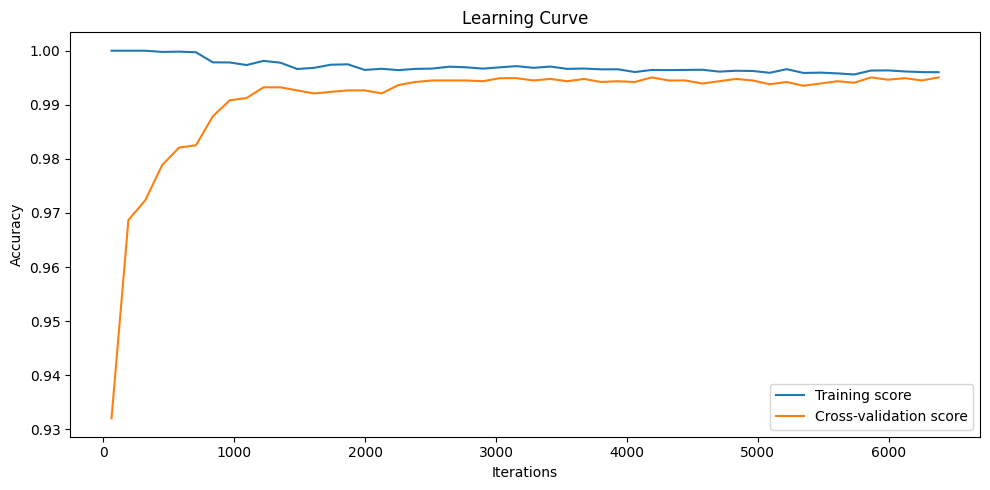

In [51]:
# Plot learning curve wrt iterations
plt.figure(figsize=(10, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score')
# Set range of X axis to 1000
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.tight_layout()
plt.show()